## Problem Session 1

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Gaussian Tails

We can use rejection sampling to obtain samples from a conditional Gaussian distribution $Z|Z ≥ C$ where $Z~N(0,1)$ and C=10 (or possibly even larger for a rarer event

b) Use a N(C,1) trial distribution. What is the resulting algorithm and what is the expected wait time to acceptance?

In [ ]:
C=10
num_samples = 1000
x = np.random.normal(C, 1, num_samples)
U = np.random.uniform(0, 1, num_samples)
x_arr = []
i_last = 0
waiting_time = []

for i in range(num_samples):
    xi = x[i]
    I = int(1 if xi>C else 0)
    Ui = U[i]
    r = np.exp(-C*(xi)) * I
    if Ui < r:
        x_arr = np.append(x_arr, xi)
        time_between = i-i_last
        waiting_time = np.append(waiting_time, time_between)
        i_last = i

plt.hist(x_arr)
plt.title('Gaussian tail')
#Expected wait time to acceptance
print(np.mean(waiting_time[1:]))

In [7]:
C=10
num_samples = 100000
x = np.random.normal(C, 1, num_samples)
U = np.random.uniform(0, 1, num_samples)
x_arr = []
i_last = 0
waiting_time = []

for i in range(num_samples):
    xi = x[i]
    I = int(1 if xi>C else 0)
    Ui = U[i]
    r = np.exp(-C*(xi-C)) * I
    if Ui < r:
        x_arr = np.append(x_arr, xi)
        time_between = i-i_last
        waiting_time = np.append(waiting_time, time_between)
        i_last = i
    


Text(0, 0.5, 'Frequency')

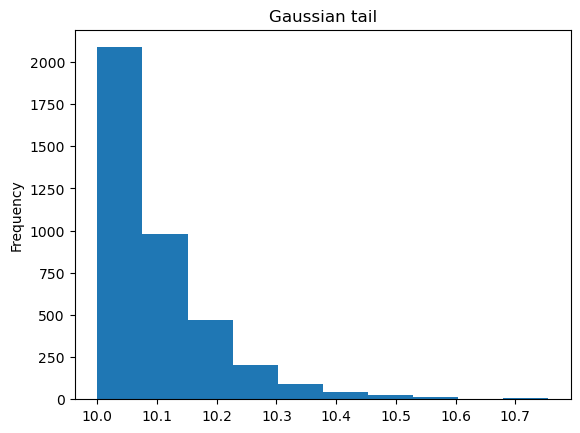

In [ ]:
plt.hist(x_arr)
plt.title('Gaussian tail')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Waiting time for acceptance while using a shifted distribution')

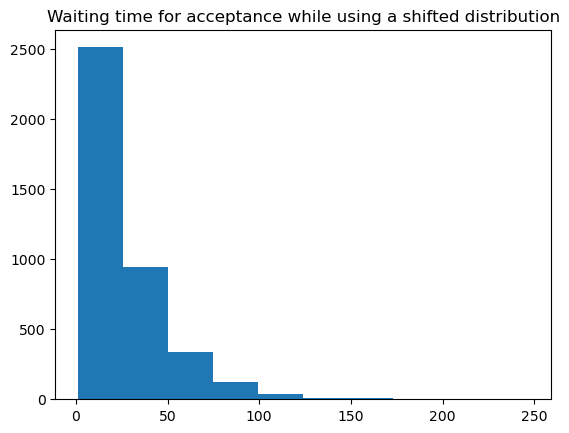

In [35]:
plt.hist(waiting_time)
plt.title('Waiting time for acceptance while using a shifted distribution')

In [38]:
#Expected wait time to acceptance
np.mean(waiting_time[1:])

25.183879093198993

### Digits of $\pi$

a) Write a Monte Carlo method to calculate $\pi$ to 100 digit accuracy

In [48]:
num_samples = 10000000
U1 = np.random.uniform(0, 1, num_samples)
U2 = np.random.uniform(0, 1, num_samples)
accept = 0

bool_accept = U2 < (1 - U1**2)
pi_est = (np.sum(bool_accept)/num_samples)
pi_est
#Source: https://blogs.sas.com/content/iml/2016/03/14/monte-carlo-estimates-of-pi.html#:~:text=To%20compute%20Monte%20Carlo%20estimates,the%20curve%20is%20%CF%80%20%2F%204. 

0.6666934